# Exercícios 3 e 4 - Seção 6.5

Rafael Ragozoni Conrado 290268

3. A Lahman Baseball Database é uma das fontes de dados mais abrangentes e respeitadas para estatísticas e informações sobre beisebol nos Estados Unidos e no Canadá. Foi criada por Sean Lahman e contém uma ampla variedade de dados históricos e estatísticas relacionadas ao beisebol, incluindo informações sobre jogadores, equipes, estatísticas de temporada regular e pós-temporada, registros de jogos, salários, prêmios e muito mais. O link da base de dados é http://seanlahman.com/. Acesse os dados da última versão e faça os exercícios propostos na Seção 22.4 em [63].

4. Faça o exercício 13 da Seção 23.5 em [63]. Técnicas de raspagem de dados da rede em R e Python são, respectivamente, apresentadas no Capítulo 23 em [63] e em [23].

#### 1. Install and load the Lahman library. This database includes data related to baseball teams. It includes summary statistics about how the players performed on offense and defense for several years. It also includes personal information about the players.

The Batting data frame contains the offensive statistics for all players for many years.

In [1]:
import numpy as np 
import pandas as pd
from plotnine import *

In [2]:
batting = pd.read_csv("lahman_1871-2023_csv/Batting.csv")
batting.head()

,playerID,yearID,stint,teamID,lgID,G,G_batting,AB,R,H,...,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,G_old
0,aardsda01,2004,1,SFN,NL,11,NaN,0,0,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,aardsda01,2006,1,CHN,NL,45,NaN,2,0,0,...,0.0,0.0,0,0.0,0.0,0.0,1.0,0.0,0.0,NaN
2,aardsda01,2007,1,CHA,AL,25,NaN,0,0,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,aardsda01,2008,1,BOS,AL,47,NaN,1,0,0,...,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,NaN
4,aardsda01,2009,1,SEA,AL,73,NaN,0,0,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [3]:
top = batting[batting["yearID"] == 2016].sort_values("HR", ascending=False)[:10]
top

,playerID,yearID,stint,teamID,lgID,G,G_batting,AB,R,H,...,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,G_old
103772,trumbma01,2016,1,BAL,AL,159,NaN,613,94,157,...,2.0,0.0,51,170.0,1.0,3.0,0.0,0.0,14.0,NaN
22463,cruzne02,2016,1,SEA,AL,155,NaN,589,96,169,...,2.0,0.0,62,159.0,5.0,9.0,0.0,7.0,15.0,NaN
29385,encared01,2016,1,TOR,AL,160,NaN,601,99,158,...,2.0,0.0,87,138.0,3.0,5.0,0.0,8.0,22.0,NaN
24045,daviskh01,2016,1,OAK,AL,150,NaN,555,85,137,...,1.0,2.0,42,166.0,0.0,8.0,0.0,5.0,19.0,NaN
27201,doziebr01,2016,1,MIN,AL,155,NaN,615,104,165,...,18.0,2.0,61,138.0,6.0,8.0,2.0,5.0,12.0,NaN
16151,cartech02,2016,1,MIL,NL,160,NaN,549,84,122,...,3.0,1.0,76,206.0,1.0,9.0,0.0,10.0,18.0,NaN
2819,arenano01,2016,1,COL,NL,160,NaN,618,116,182,...,2.0,3.0,68,103.0,10.0,2.0,0.0,8.0,17.0,NaN
33647,frazito01,2016,1,CHA,AL,158,NaN,590,89,133,...,15.0,5.0,64,163.0,1.0,4.0,1.0,7.0,11.0,NaN
15320,canoro01,2016,1,SEA,AL,161,NaN,655,107,195,...,0.0,1.0,47,100.0,8.0,8.0,0.0,5.0,18.0,NaN
12752,bryankr01,2016,1,CHN,NL,155,NaN,603,121,176,...,8.0,5.0,75,154.0,5.0,18.0,0.0,3.0,3.0,NaN


We can see column names nameFirst and nameLast. Use the left_join function to create a table of the top home run hitters. The table should have **playerID, first name, last name, and number of home runs (HR)**. Rewrite the object top with this new table.

In [4]:
people = pd.read_csv("lahman_1871-2023_csv/People.csv", encoding="ISO-8859-1")
people.columns

Index(['ID', 'playerID', 'birthYear', 'birthMonth', 'birthDay', 'birthCity',
       'birthCountry', 'birthState', 'deathYear', 'deathMonth', 'deathDay',
       'deathCountry', 'deathState', 'deathCity', 'nameFirst', 'nameLast',
       'nameGiven', 'weight', 'height', 'bats', 'throws', 'debut', 'bbrefID',
       'finalGame', 'retroID'],
      dtype='object')

In [5]:
top = top[["playerID", "HR"]]
top = pd.merge(top,people[["playerID", "nameFirst", "nameLast"]], on="playerID", how='left')
top = top[["playerID", "nameFirst", "nameLast", "HR"]]
top

,playerID,nameFirst,nameLast,HR
0,trumbma01,Mark,Trumbo,47
1,cruzne02,Nelson,Cruz,43
2,encared01,Edwin,Encarnacion,42
3,daviskh01,Khris,Davis,42
4,doziebr01,Brian,Dozier,42
5,cartech02,Chris,Carter,41
6,arenano01,Nolan,Arenado,41
7,frazito01,Todd,Frazier,40
8,canoro01,Robinson,Cano,39
9,bryankr01,Kris,Bryant,39


#### 2. Now use the Salaries data frame to add each player’s salary to the table you created in exercise 1. Note that salaries are different every year so make sure to filter for the year 2016, then use right_join. This time show first name, last name, team, HR, and salary.

In [6]:
salaries = pd.read_csv("lahman_1871-2023_csv/Salaries.csv")
salaries, salaries.columns

(       yearID teamID lgID   playerID    salary
 0        1985    ATL   NL  barkele01    870000
 1        1985    ATL   NL  bedrost01    550000
 2        1985    ATL   NL  benedbr01    545000
 3        1985    ATL   NL   campri01    633333
 4        1985    ATL   NL  ceronri01    625000
 ...       ...    ...  ...        ...       ...
 26423    2016    WAS   NL  strasst01  10400000
 26424    2016    WAS   NL  taylomi02    524000
 26425    2016    WAS   NL  treinbl01    524900
 26426    2016    WAS   NL  werthja01  21733615
 26427    2016    WAS   NL  zimmery01  14000000
 
 [26428 rows x 5 columns],
 Index(['yearID', 'teamID', 'lgID', 'playerID', 'salary'], dtype='object'))

In [7]:
salaries = salaries[salaries["yearID"] == 2016]
salaries

,yearID,teamID,lgID,playerID,salary
25575,2016,ARI,NL,ahmedni01,521600
25576,2016,ARI,NL,barreja01,507500
25577,2016,ARI,NL,brachsi01,509300
25578,2016,ARI,NL,britoso01,508500
25579,2016,ARI,NL,castiwe01,3700000
...,...,...,...,...,...
26423,2016,WAS,NL,strasst01,10400000
26424,2016,WAS,NL,taylomi02,524000
26425,2016,WAS,NL,treinbl01,524900
26426,2016,WAS,NL,werthja01,21733615


In [8]:
teams = pd.read_csv("lahman_1871-2023_csv/Teams.csv")
teams= teams[teams["yearID"] == 2016]
teams.columns

Index(['yearID', 'lgID', 'teamID', 'franchID', 'divID', 'Rank', 'G', 'Ghome',
       'W', 'L', 'DivWin', 'WCWin', 'LgWin', 'WSWin', 'R', 'AB', 'H', '2B',
       '3B', 'HR', 'BB', 'SO', 'SB', 'CS', 'HBP', 'SF', 'RA', 'ER', 'ERA',
       'CG', 'SHO', 'SV', 'IPouts', 'HA', 'HRA', 'BBA', 'SOA', 'E', 'DP', 'FP',
       'name', 'park', 'attendance', 'BPF', 'PPF', 'teamIDBR',
       'teamIDlahman45', 'teamIDretro'],
      dtype='object')

In [9]:
salary_and_team = pd.merge(salaries[["teamID","playerID","salary"]],teams[["teamID","name"]], on="teamID", how="left")
salary_and_team

,teamID,playerID,salary,name
0,ARI,ahmedni01,521600,Arizona Diamondbacks
1,ARI,barreja01,507500,Arizona Diamondbacks
2,ARI,brachsi01,509300,Arizona Diamondbacks
3,ARI,britoso01,508500,Arizona Diamondbacks
4,ARI,castiwe01,3700000,Arizona Diamondbacks
...,...,...,...,...
848,WAS,strasst01,10400000,Washington Nationals
849,WAS,taylomi02,524000,Washington Nationals
850,WAS,treinbl01,524900,Washington Nationals
851,WAS,werthja01,21733615,Washington Nationals


In [10]:
top = pd.merge(salary_and_team, top, on="playerID", how="right")
top = top[["nameFirst","nameLast","name","HR","salary"]]
top

,nameFirst,nameLast,name,HR,salary
0,Mark,Trumbo,Baltimore Orioles,47,9150000
1,Nelson,Cruz,Seattle Mariners,43,14250000
2,Edwin,Encarnacion,Toronto Blue Jays,42,10000000
3,Khris,Davis,Oakland Athletics,42,524500
4,Brian,Dozier,Minnesota Twins,42,3000000
5,Chris,Carter,Milwaukee Brewers,41,2500000
6,Nolan,Arenado,Colorado Rockies,41,5000000
7,Todd,Frazier,Chicago White Sox,40,8250000
8,Robinson,Cano,Seattle Mariners,39,24000000
9,Kris,Bryant,Chicago Cubs,39,652000


#### 3. In a previous exercise, we created a tidy version of the co2 dataset. We want to see if the monthly trend is changing so we are going to remove the year effects and then plot the results. We will first compute the year averages. Use the group_by and summarize to compute the average co2 for each year. Save in an object called yearly_avg.

In [11]:
co2 = pd.read_csv("co2.csv")
co2["time"] = co2["time"].astype(int)
co2

,rownames,time,value
0,1,1959,315.42
1,2,1959,316.31
2,3,1959,316.50
3,4,1959,317.56
4,5,1959,318.13
...,...,...,...
463,464,1997,362.57
464,465,1997,360.24
465,466,1997,360.83
466,467,1997,362.49


In [12]:
yearly_avg = co2.groupby('time')['value'].mean()
yearly_avg = pd.DataFrame(yearly_avg)
yearly_avg

,value
time,
1959,315.825833
1960,316.747500
1961,317.485000
1962,318.297500
1963,318.832500
1964,319.462500
1965,319.872500
1966,321.210000
1967,322.020000


#### 4. Now use the left_join function to add the yearly average to the co2_wide dataset. Then compute the residuals: observed co2 measure - yearly average.

In [13]:
co2_wide = pd.merge(co2,yearly_avg, on="time", how= "left")

co2_wide = co2_wide.rename(columns={
    "value_x":"co2_emission",
    "value_y":"yearly_avg_co2_emission",
    "time":"year"
    })

co2_wide

,rownames,year,co2_emission,yearly_avg_co2_emission
0,1,1959,315.42,315.825833
1,2,1959,316.31,315.825833
2,3,1959,316.50,315.825833
3,4,1959,317.56,315.825833
4,5,1959,318.13,315.825833
...,...,...,...,...
463,464,1997,362.57,363.817500
464,465,1997,360.24,363.817500
465,466,1997,360.83,363.817500
466,467,1997,362.49,363.817500


In [14]:
co2_wide["residuals"] = co2_wide["co2_emission"] - co2_wide["yearly_avg_co2_emission"]
co2_wide

,rownames,year,co2_emission,yearly_avg_co2_emission,residuals
0,1,1959,315.42,315.825833,-0.405833
1,2,1959,316.31,315.825833,0.484167
2,3,1959,316.50,315.825833,0.674167
3,4,1959,317.56,315.825833,1.734167
4,5,1959,318.13,315.825833,2.304167
...,...,...,...,...,...
463,464,1997,362.57,363.817500,-1.247500
464,465,1997,360.24,363.817500,-3.577500
465,466,1997,360.83,363.817500,-2.987500
466,467,1997,362.49,363.817500,-1.327500


In [15]:
# colocando meses para calcular a média de emissão de co2 por
# mês e poder calcular o residual mensal que representaria como
# deveriam ser as tendencias naturais de emissão ao longo do ano
# sem a intervenção de eventos pontuais de alguns anos que poderiam afetar 
months = []
for i in range(len(co2_wide['year'])):
    months.append(i%12 + 1)

co2_wide['month'] = months
co2_wide

,rownames,year,co2_emission,yearly_avg_co2_emission,residuals,month
0,1,1959,315.42,315.825833,-0.405833,1
1,2,1959,316.31,315.825833,0.484167,2
2,3,1959,316.50,315.825833,0.674167,3
3,4,1959,317.56,315.825833,1.734167,4
4,5,1959,318.13,315.825833,2.304167,5
...,...,...,...,...,...,...
463,464,1997,362.57,363.817500,-1.247500,8
464,465,1997,360.24,363.817500,-3.577500,9
465,466,1997,360.83,363.817500,-2.987500,10
466,467,1997,362.49,363.817500,-1.327500,11


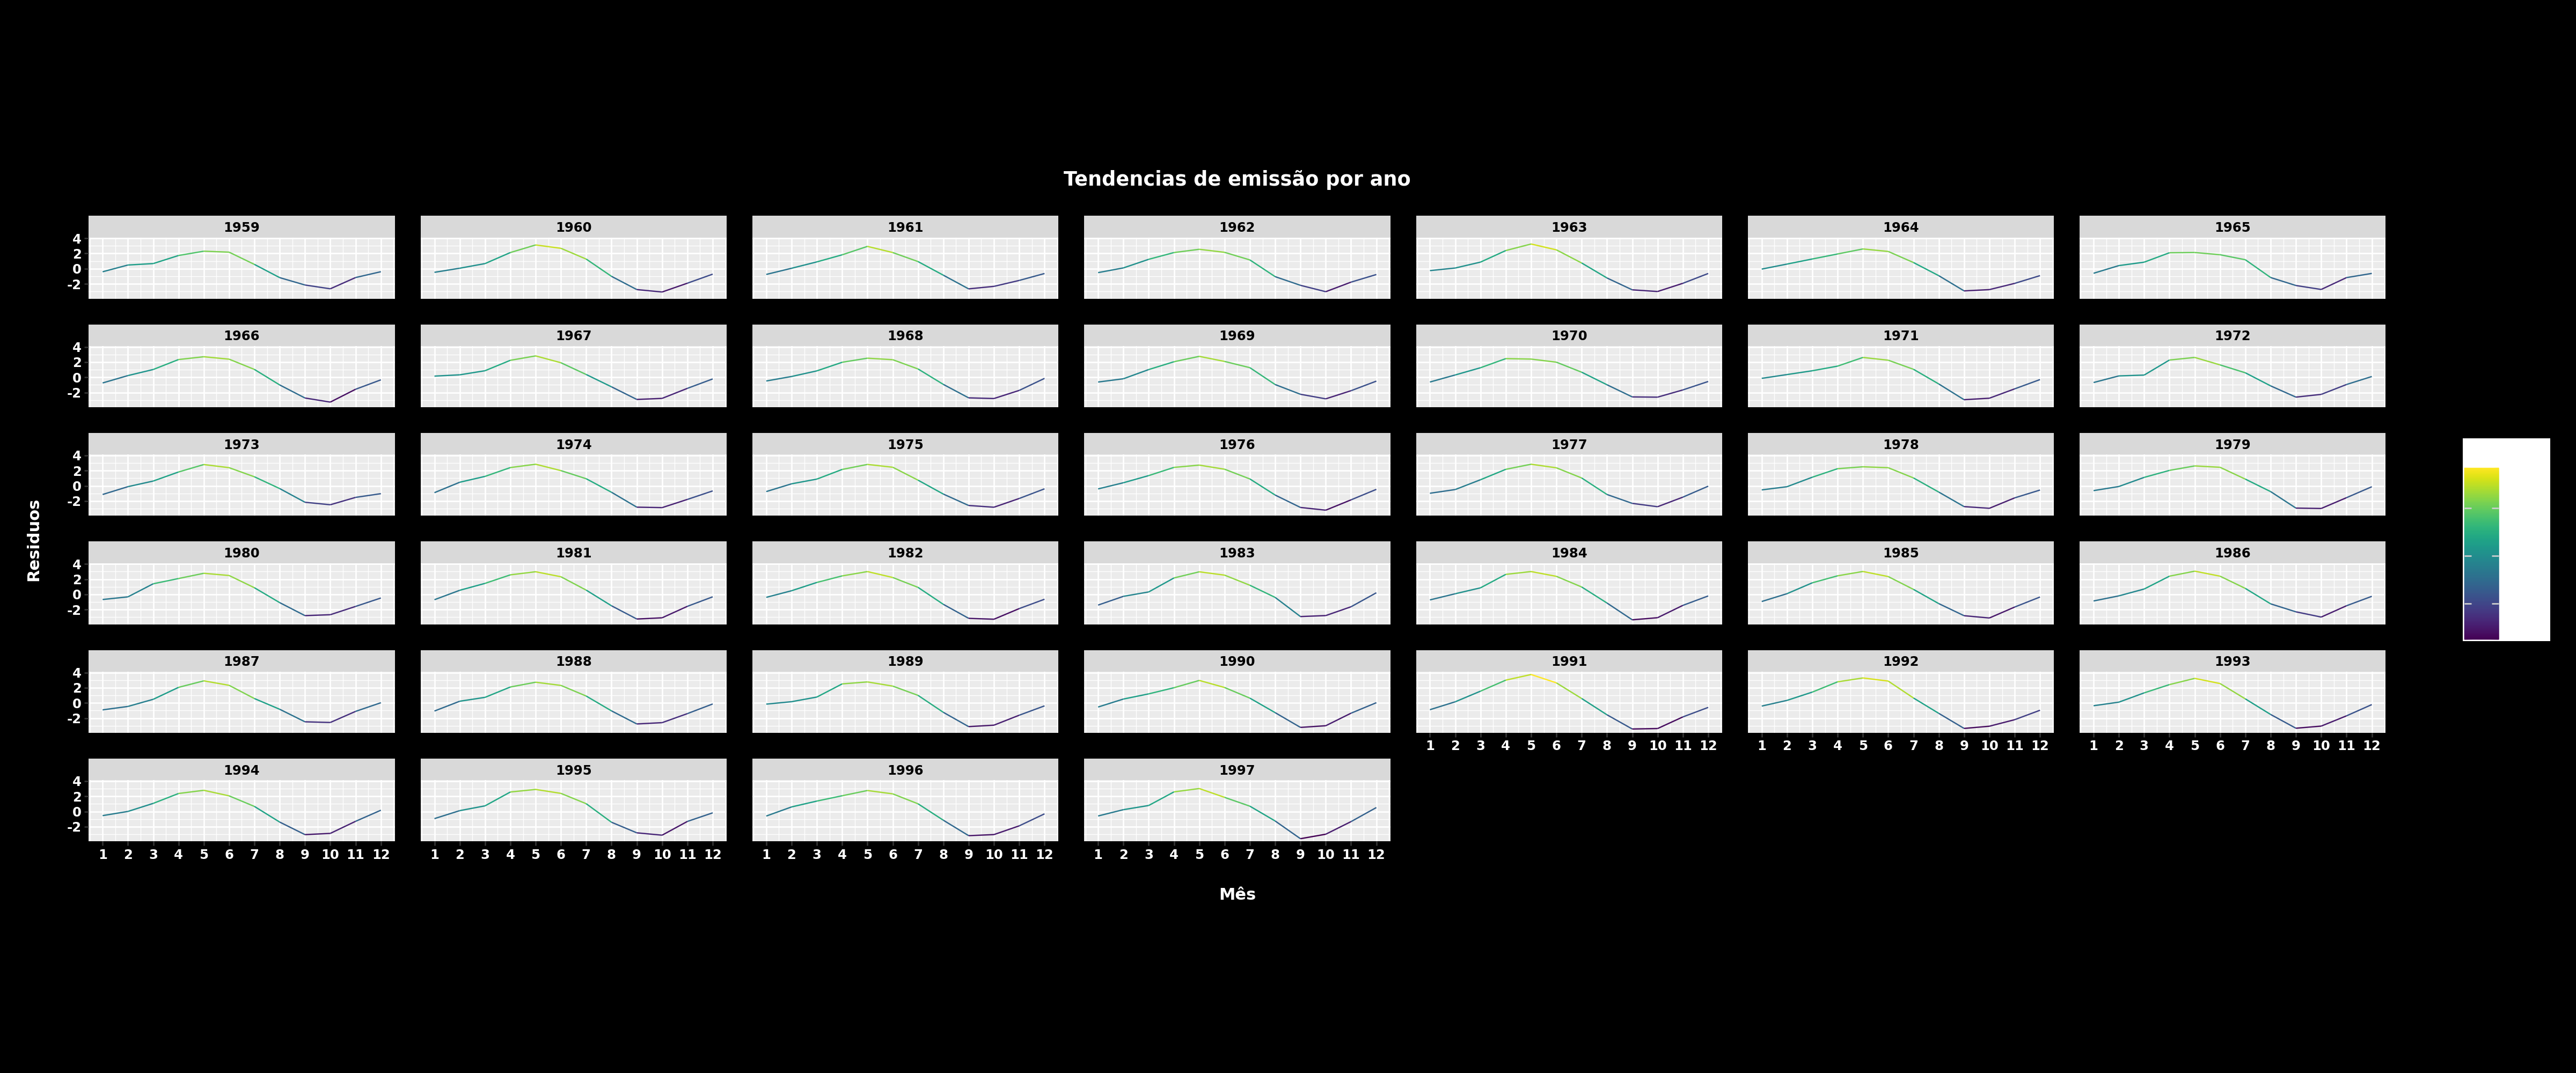

In [18]:
ggplot(co2_wide) \
  + aes(x="month", y="residuals", color="residuals") \
  + geom_line() \
  + facet_wrap('~ year') \
  + scale_x_continuous(breaks=range(1, 13)) \
  + labs(title='Tendencias de emissão por ano', y='Residuos', x='Mês') \
  + theme(aspect_ratio=0.2, figure_size=(24,10)
          , text= element_text(colour = "white", face = "bold") 
          , strip_text = element_text(colour = "black", face = "bold") 
          )



#### 13. Advanced: extract the titles of the movies that won Best Picture from this website: https://m.imdb.com/chart/bestpicture/

In [22]:
import requests

from bs4 import BeautifulSoup
import pandas as pd
import time

In [43]:
url = "https://m.imdb.com/chart/bestpicture/"
response = requests.get(url)
response.status_code

403

https://www.youtube.com/watch?v=JesHXRoJbzw

In [44]:
import random


userAgents=["Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/123.0.0.0 Safari/537.36",
            "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/124.0.0.0 Safari/537.36",
            "Mozilla/5.0 (X11; Linux x86_64; rv:125.0) Gecko/20100101 Firefox/125.0",
            "Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:125.0) Gecko/20100101 Firefox/125.0"
            ]
response = requests.get(url, headers={'User-Agent': random.choice(userAgents)})
response.status_code

200

In [55]:
soup = BeautifulSoup(response.content,'html.parser')
titulos = soup.select('h3[class="ipc-title__text"]')
titulos

[<h3 class="ipc-title__text">1. Oppenheimer</h3>,
 <h3 class="ipc-title__text">2. Tudo em Todo o Lugar ao Mesmo Tempo</h3>,
 <h3 class="ipc-title__text">3. No Ritmo do Coração</h3>,
 <h3 class="ipc-title__text">4. Nomadland</h3>,
 <h3 class="ipc-title__text">5. Parasita</h3>,
 <h3 class="ipc-title__text">6. Green Book: O Guia</h3>,
 <h3 class="ipc-title__text">7. A Forma da Água</h3>,
 <h3 class="ipc-title__text">8. Moonlight: Sob a Luz do Luar</h3>,
 <h3 class="ipc-title__text">9. Spotlight: Segredos Revelados</h3>,
 <h3 class="ipc-title__text">10. Birdman ou (A Inesperada Virtude da Ignorância)</h3>,
 <h3 class="ipc-title__text">11. 12 Anos de Escravidão</h3>,
 <h3 class="ipc-title__text">12. Argo</h3>,
 <h3 class="ipc-title__text">13. O Artista</h3>,
 <h3 class="ipc-title__text">14. O Discurso do Rei</h3>,
 <h3 class="ipc-title__text">15. Quem Quer Ser um Milionário?</h3>,
 <h3 class="ipc-title__text">16. Guerra ao Terror</h3>,
 <h3 class="ipc-title__text">17. Onde os Fracos Não Têm

In [58]:
movies = []
for titulo in titulos:
    print(titulo.text.strip())


1. Oppenheimer
2. Tudo em Todo o Lugar ao Mesmo Tempo
3. No Ritmo do Coração
4. Nomadland
5. Parasita
6. Green Book: O Guia
7. A Forma da Água
8. Moonlight: Sob a Luz do Luar
9. Spotlight: Segredos Revelados
10. Birdman ou (A Inesperada Virtude da Ignorância)
11. 12 Anos de Escravidão
12. Argo
13. O Artista
14. O Discurso do Rei
15. Quem Quer Ser um Milionário?
16. Guerra ao Terror
17. Onde os Fracos Não Têm Vez
18. Os Infiltrados
19. Crash: No Limite
20. Menina de Ouro
21. O Senhor dos Anéis: O Retorno do Rei
22. Chicago
23. Uma Mente Brilhante
24. Gladiador
25. Beleza Americana
26. Shakespeare Apaixonado
27. Titanic
28. O Paciente Inglês
29. Coração Valente
30. Forrest Gump: O Contador de Histórias
31. A Lista de Schindler
32. Os Imperdoáveis
33. O Silêncio dos Inocentes
34. Dança com Lobos
35. Conduzindo Miss Daisy
36. Rain Man
37. O Último Imperador
38. Platoon
39. Entre Dois Amores
40. Amadeus
41. Laços de Ternura
42. Gandhi
43. Carruagens de Fogo
44. Gente como a Gente
45. Kramer